Missing values per column:
 CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Linear Regression Performance:
MAE: 0.847
RMSE: 1.214
R² Score: 0.975

Random Forest Performance:
MAE: 0.020
RMSE: 0.339
R² Score: 0.998

Random Forest Performance:
MAE: 0.020
RMSE: 0.339
R² Score: 0.998

XGBoost Performance:
MAE: 0.077
RMSE: 0.563
R² Score: 0.995

✅ Best performing model saved to: '../models/best_model.pkl'

XGBoost Performance:
MAE: 0.077
RMSE: 0.563
R² Score: 0.995

✅ Best performing model saved to: '../models/best_model.pkl'


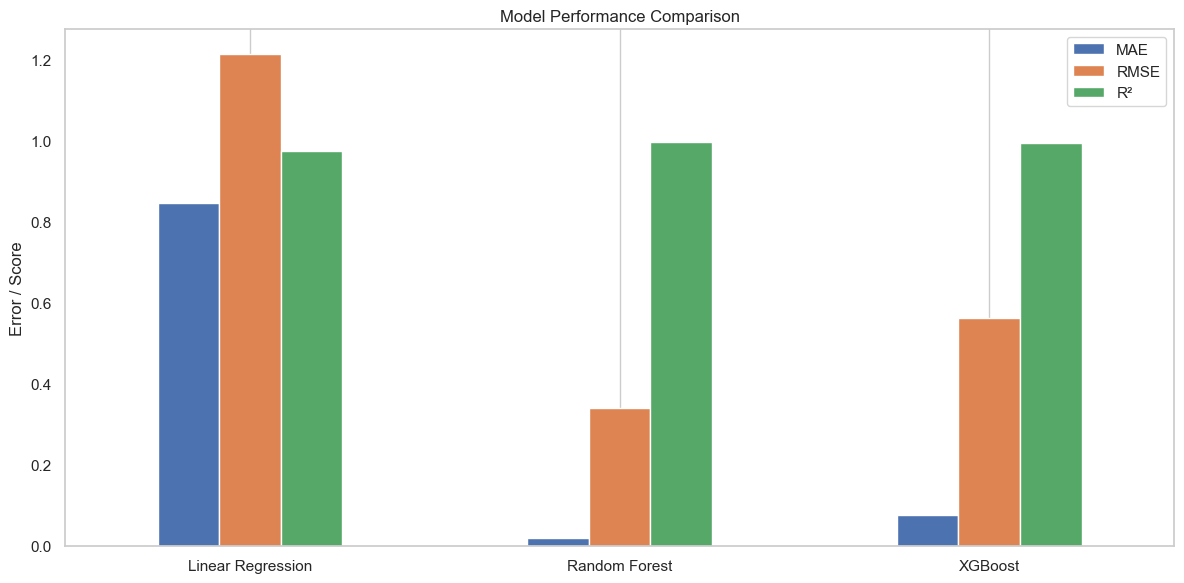

In [4]:
# Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Loading preprocessed data.
df = pd.read_csv('../data/processed/air_quality_cleaned.csv', parse_dates=['Datetime'], index_col='Datetime')

# Checking for null values (should be clean, but safe to confirm),.
print("Missing values per column:\n", df.isnull().sum())

# Defining target variable and features.
target = 'C6H6(GT)'
features = df.drop(columns=[target]).columns

X = df[features]
y = df[target]

# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models.
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

# Training and evaluating each model.
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")

# Saving the best performing model for future reference.
# Random Forest is the best performing model based on evaluation.
best_model = models['Random Forest']
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("\n✅ Best performing model saved to: '../models/best_model.pkl'")

# Plotting comparison of model performance.
results_df = pd.DataFrame(results).T

results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error / Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
